### Binary Classification of Machine Failures

- Data Extraction 
- Data Prepartion 
- Model Building 
- Model Deployement 

#### Model Extraction 

This invloves the following: 

- Data Collection 
- Data Retrieval  

In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn


In [32]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
df= pd.merge(train_data,test_data,how='outer')
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0.0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0.0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0.0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0.0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227378,227378,L51130,L,302.3,311.4,1484,40.4,15,NaN,0,0,0,0,0
227379,227379,L47783,L,297.9,309.8,1542,33.8,31,NaN,0,0,0,0,0
227380,227380,L48097,L,295.6,306.2,1501,41.4,187,NaN,0,0,0,0,0
227381,227381,L48969,L,298.1,307.8,1534,40.3,69,NaN,0,0,0,0,0


In [33]:
shuffled_df = df.sample(frac=1)

In [34]:
shuffled_df.drop(['id','Product ID'],axis=1,inplace=True)
shuffled_df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
161032,L,301.4,310.4,1457,47.3,90,NaN,0,0,0,0,0
31069,L,300.6,309.4,1733,24.8,55,0.0,0,0,0,0,0
135182,L,298.3,309.1,1611,33.2,124,0.0,0,0,0,0,0
142415,L,300.6,310.4,1394,46.7,215,NaN,0,0,0,0,0
1597,L,298.4,309.4,1730,28.4,7,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99834,L,299.0,308.7,1537,40.0,202,0.0,0,0,0,0,0
80323,M,304.4,313.6,1495,38.6,2,0.0,0,0,0,0,0
96983,L,298.3,308.8,1367,49.3,176,0.0,0,0,0,0,0
37544,L,300.7,310.4,1295,47.3,203,0.0,0,0,0,0,0


In [35]:
list=[]
for i in shuffled_df.columns:
    if i !="Machine failure":
        list.append(i)
        
list

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [39]:
df= shuffled_df

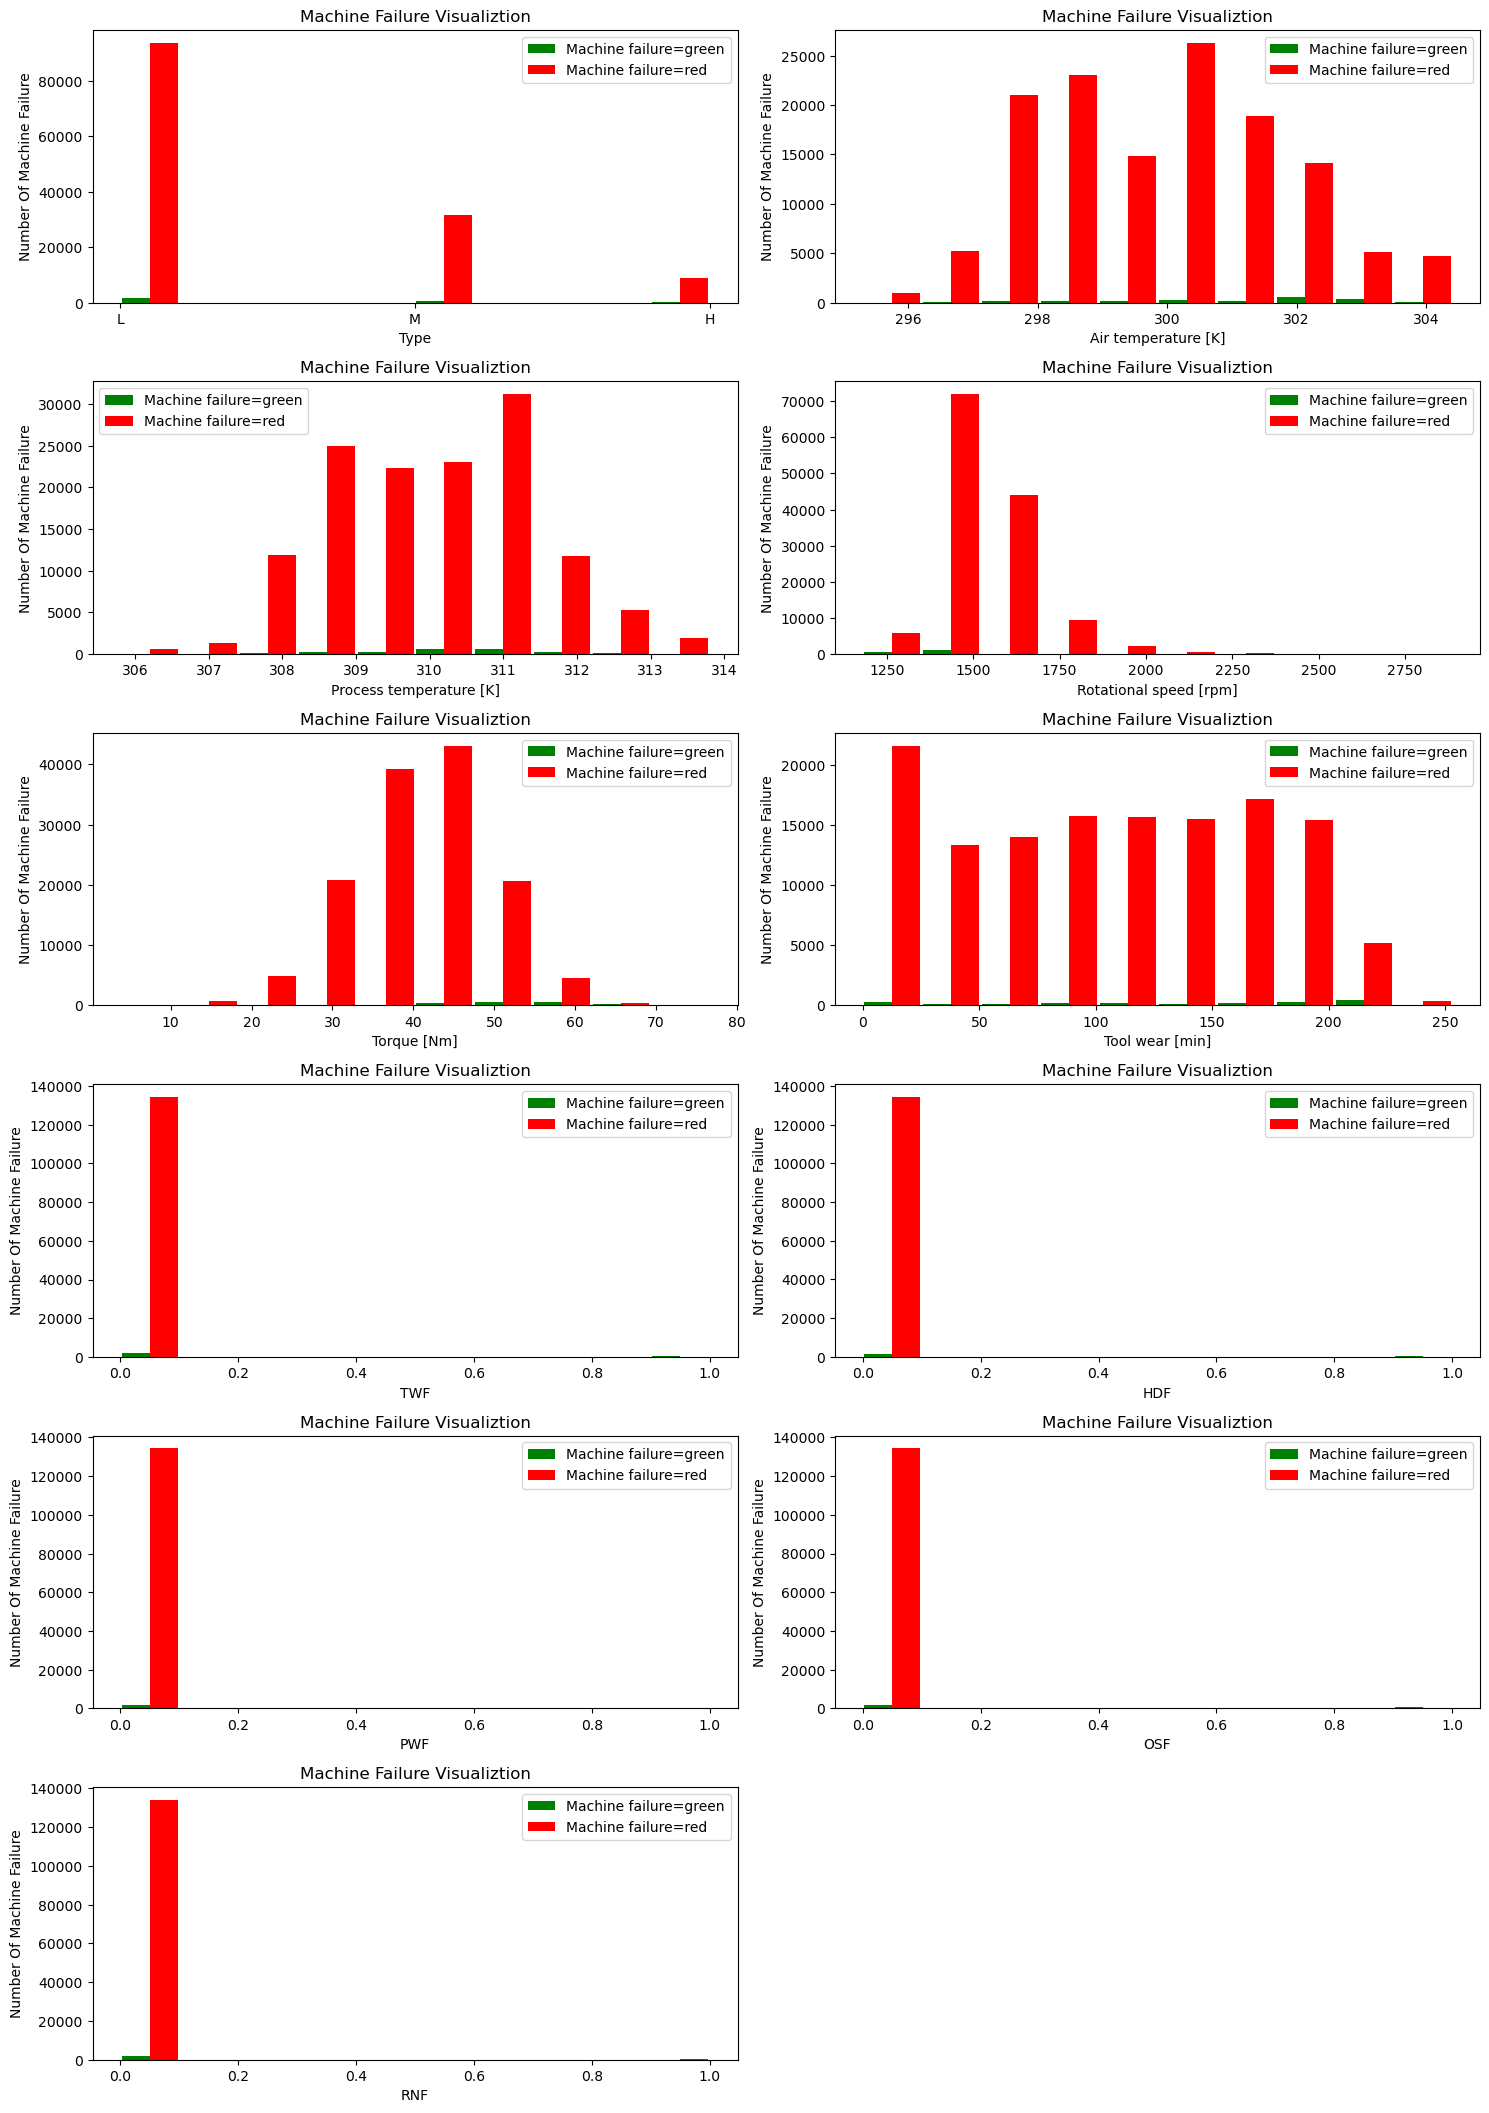

In [43]:
# The relationship between the features and the Target 
plt.figure(figsize=(15,70))
for n,column in enumerate(list):
    plot=plt.subplot(20,2,n+1)
    machine_failure_1 = df[df['Machine failure']==1][column]   
    machine_failure_0 = df[df['Machine failure']==0][column]
    plt.xlabel(column)
    plt.ylabel("Number Of Machine Failure")
    plt.title("Machine Failure Visualiztion")
    plt.hist([machine_failure_1, machine_failure_0], rwidth=0.95, color=['green','red'], label=['Machine failure=green','Machine failure=red'])
    plt.tight_layout()
    plt.legend()
plt.show()